# 1. 数据总览

Kaggle上Titanic尼克号生存模型预测，其中包含了两组数据：train.csv和test.csv，分别为训练集和测试集。

In [1]:
#首先加载相关的库
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#将matplotlib的图表直接嵌入到Notebook之中
%matplotlib inline

In [2]:
#加载数据，观察数据的整体结构和类型
train = pd.read_csv('data/train.csv')

sns.set_style('whitegrid')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#查看信息总览
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


从上面可以看到总共有891个乘客的信息，但Age、Carbin、Embarked几个特征列数据存在部分缺失

In [4]:
#先查看以下总体的乘客存活情况
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

可以看到有342人存活，有549人未存活

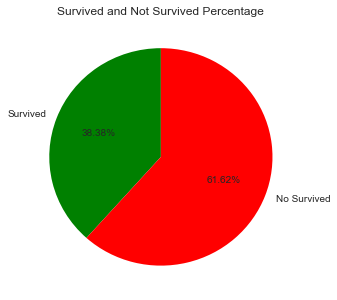

In [5]:
#接下来绘制绘制存活情况的比例
plt.figure(figsize=(5,5))
total_survived = train.Survived.sum()
total_no_survived = 891 - total_survived
plt.pie([total_survived,total_no_survived],
        labels=['Survived','No Survived'],autopct='%1.2f%%',
        colors=('green','red'),
       startangle=90)
plt.title('Survived and Not Survived Percentage')
plt.show()

从饼状图中可以看到，在这891名乘客中，生还比例为38.38%，未生还比例为61.62%。

接下来，分别分析Pclass、Sex、Age、SibSp、Far、Carbin、和Embarked等与“Survived”之间的关系

### 不同Pcalss

#### 不同级别客舱的人数和比例

In [6]:
pclass_count = train[['Pclass','Survived']].groupby(['Pclass']).count()
pclass_count

,Survived
Pclass,
1,216
2,184
3,491


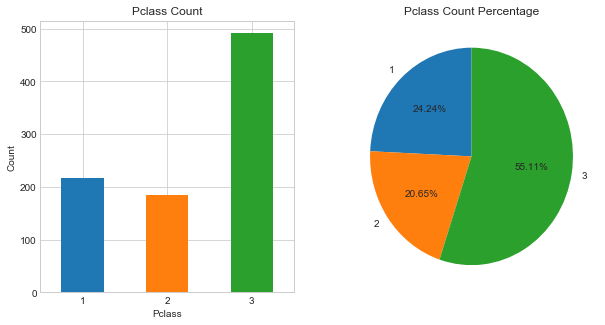

In [7]:
#绘制不同级别客舱的人数和比例
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
pclass_count.Survived.plot(kind='bar',
                           title='Pclass Count',
                           rot=0
                  )
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(pclass_count,labels=['1','2','3'],
        autopct='%1.2f%%',
       startangle=90)
plt.title('Pclass Count Percentage')
plt.show()

可以看到在海难发生前，一等舱、二等舱、三等舱乘客分别为216、184、491人，分别占比为24.24%、56.11%、20.65%

#### 不同级别客舱生还人数和占总生还人数的比例

In [8]:
survived_df = train[train['Survived']==1]
survived_count = survived_df[['Pclass','Survived']].groupby(['Pclass']).sum()
survived_count

,Survived
Pclass,
1,136
2,87
3,119


Text(0.5,1,'Pclass Survived Percentage')

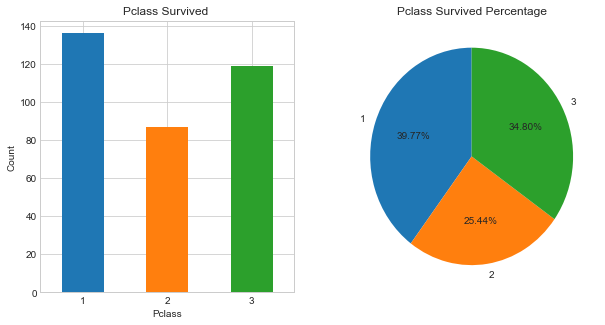

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
survived_count.Survived.plot(kind='bar',
                             title='Pclass Survived ',rot=0)
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(survived_count,labels=('1','2','3'),
        autopct='%1.2f%%',
       startangle=90)
plt.title('Pclass Survived Percentage')

可以看到在海难发生以后，一等舱、二等舱、三等舱的生还人数降为了136人、87、119人，分别占总生还人生的39.77%、25.44%、34.80%

#### 不同级别客舱单独的生还和未生情况分析

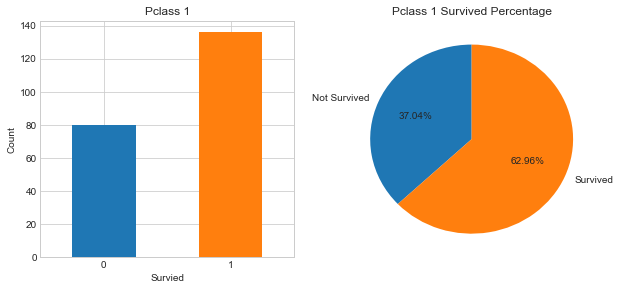

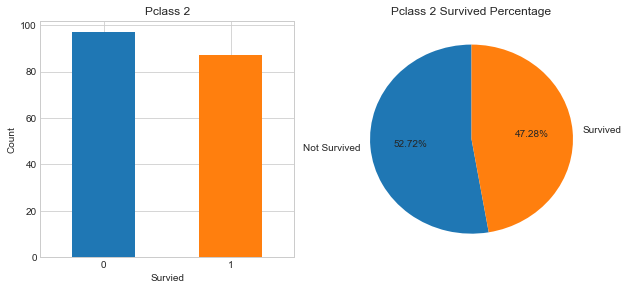

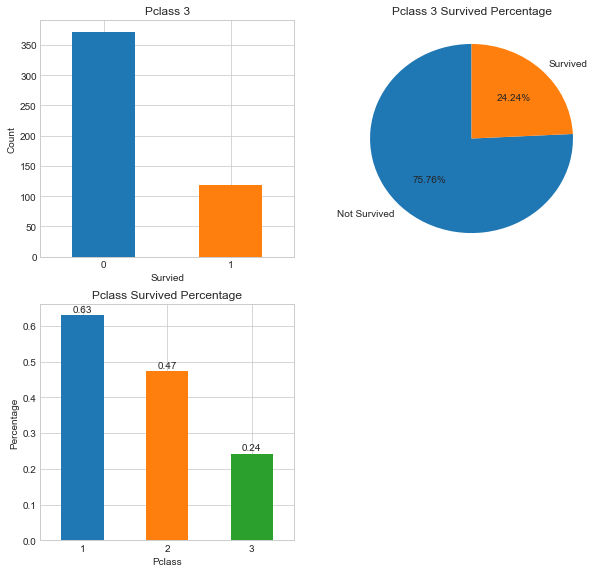

In [10]:
pclass1 = train[train['Pclass'] == 1]
pclass1_count = pd.value_counts(pclass1.Survived,sort=False)

pclass2 = train[train['Pclass'] == 2]
pclass2_count = pd.value_counts(pclass2.Survived,sort=False)

pclass3 = train[train['Pclass'] == 3]
pclass3_count = pd.value_counts(pclass3.Survived,sort=False)

#一等舱的生还和未生还情况
plt.figure(figsize=(10,20))
plt.subplot(4,2,1)
pclass1_count.plot(kind='bar',title='Pclass 1',rot=0)
plt.xlabel('Survied')
plt.ylabel('Count')

plt.subplot(4,2,2)
plt.pie(pclass1_count,labels=('Not Survived','Survived'),
        autopct='%1.2f%%',
       startangle=90)
plt.title('Pclass 1 Survived Percentage')

#二等舱的生还和未生还情况
plt.figure(figsize=(10,20))
plt.subplot(4,2,3)
pclass2_count.plot(kind='bar',title='Pclass 2',rot=0)
plt.xlabel('Survied')
plt.ylabel('Count')

plt.subplot(4,2,4)
plt.pie(pclass2_count,labels=('Not Survived','Survived'),
        autopct='%1.2f%%',
       startangle=90)
plt.title('Pclass 2 Survived Percentage')

#三等舱的生还和未生还情况
plt.figure(figsize=(10,20))
plt.subplot(4,2,5)
pclass3_count.plot(kind='bar',title='Pclass 3',rot=0)
plt.xlabel('Survied')
plt.ylabel('Count')

plt.subplot(4,2,6)
plt.pie(pclass3_count,labels=('Not Survived','Survived'),
        autopct='%1.2f%%',
       startangle=90)
plt.title('Pclass 3 Survived Percentage')

plt.subplot(4,2,7)
survived_by_class = train.groupby('Pclass')['Survived'].mean()
survived_by_class.plot(kind='bar',rot=0)
plt.title('Pclass Survived Percentage')
plt.ylabel('Percentage')

value_x = survived_by_class.index
value_y = survived_by_class.values
for u,v in zip(value_x,value_y):
    
    plt.text(u-1,v + 0.01,'%1.2f'%v, ha='center')
plt.show()

可以看到一等舱的生还率为63%，二等舱生还率为47%，三等舱生还率为24%。由此可见客舱等级越高级，生还率就越高

### 不同Sex

#### 男女人数及比例

In [11]:
#男姓有577人，女性有314人
sex_count = train.Sex.value_counts()
sex_count

male      577
female    314
Name: Sex, dtype: int64

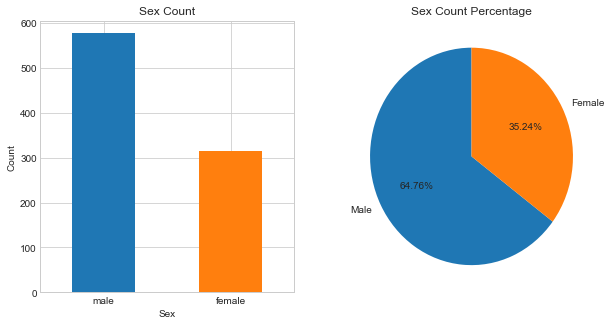

In [12]:
#绘制男女性别之间的数量和比例图
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sex_count.plot(kind='bar',rot=0)
plt.title('Sex Count')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(sex_count,labels=('Male','Female'),
        autopct='%1.2f%%',startangle=90)
plt.title('Sex Count Percentage')
plt.show()

可以看到海难发生前，男姓有577人，占比64.76%，女性有314人，占比35.2%

#### 不同性别的乘客的存活情况

In [13]:
survived_by_sex_count = train[train['Survived']==1]['Sex'].value_counts()
survived_by_sex_count

female    233
male      109
Name: Sex, dtype: int64

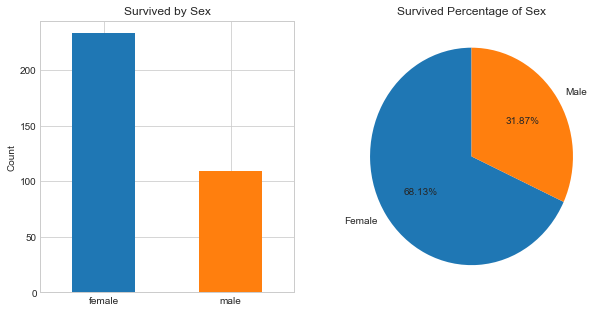

In [14]:
#绘制不同性别的生活情况
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
survived_by_sex_count.plot(kind='bar',rot=0,title='Survived by Sex')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(survived_by_sex_count,
       labels=('Female','Male'),
       autopct='%1.2f%%',
       startangle=90)
plt.title('Survived Percentage of Sex')
plt.show()

#### 男姓的生还情况


In [15]:
survived_by_male_count = train[train['Sex']=='male']['Survived'].value_counts(sort=False)
survived_by_male_count

0    468
1    109
Name: Survived, dtype: int64

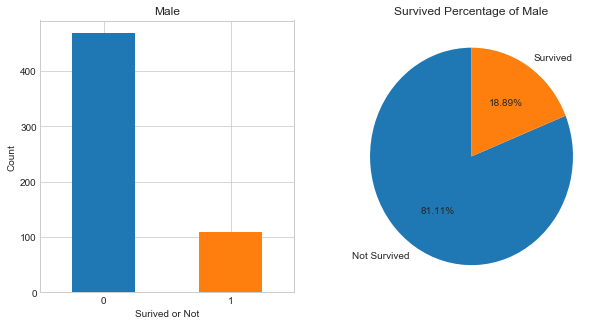

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
survived_by_male_count.plot(kind='bar',
                            rot=0,
                           title='Male')
plt.xlabel('Surived or Not')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(survived_by_male_count,
       labels=('Not Survived','Survived'),
       autopct='%1.2f%%',
       startangle=90)
plt.title('Survived Percentage of Male')
plt.show()

可以看到男姓总共生还109人，生还比例为18.89%

#### 女性的生还情况

In [17]:
survived_by_female_count = train[train['Sex']=='female']['Survived'].value_counts(sort=False)
survived_by_female_count

0     81
1    233
Name: Survived, dtype: int64

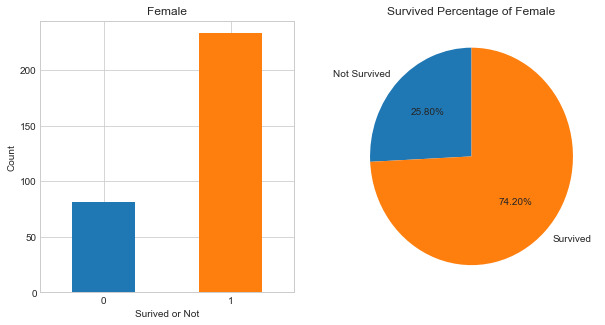

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
survived_by_female_count.plot(kind='bar',
                            rot=0,
                           title='Female')
plt.xlabel('Surived or Not')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.pie(survived_by_female_count,
       labels=('Not Survived','Survived'),
       autopct='%1.2f%%',
       startangle=90)
plt.title('Survived Percentage of Female')
plt.show()

可以看到女性总共生还人数233人，生还比例为74.20%

### 缺失值的处理方法

对缺失值的处理一般有以下处理方法：

(1) 如果数据集很多，但只有少量缺失值，可以删掉有缺失值的行，也可以采用各种方法进行缺失值填充

(2) 如果数据集数量相对不是很多，而且缺失的数量占比还比较多，则不能随便删除缺失的数据。如果缺失的数据不是很重要，可以采用均值或众数来填充缺失值。例如本例的登船位置Embarked属性，因为总共只有三个上船点，只缺失两个数据，可以用众数进行填充

In [19]:
#查看登船位置的整体分布
train[train.Embarked.notnull()]['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
#可以看到登陆位置大多数在Southampton，这里用该值来替换空值
_ = train['Embarked'].fillna('S', inplace=True)

(3) 对于分类变量，可以赋一个代表其分类的值。

In [21]:
#本次用'UN999'来填充缺失的船舱号，缺失代表可能没有船舱
_ = train['Cabin'].fillna('UN999', inplace=True)

  Age在该数据集中是一个比较重要的特征，所以为了保证一定的缺失值填充准确率是非常重要的，对结果会产生较大的影响，一般情况下描绘使用数据完整的条目作为模型的训练集，以此来预测缺失值。可以使用随机森林来预测也可以使用线性回归来预测。本次采用随机森林预测模型，选取数据集中的数值属性作为特征（因为sklearn的模型只能处理数值属性，所以这里选取数值特征，但在实际的应用中需要将非数值特征转换成数值特征）


In [22]:
#加载sklearn库
from sklearn.ensemble import RandomForestRegressor

In [23]:
#选择数据来预测年龄(age)
age_df = train[['Age','Survived','Fare','Parch','SibSp','Pclass']]
age_df_notnull = age_df[age_df.Age.notnull()]
age_df_isnull = age_df[age_df.Age.isnull()]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]

In [24]:
#使用随机森林预测缺失的年龄
rfr = RandomForestRegressor(n_estimators=1000,n_jobs=-1)
rfr.fit(X,Y)
predictAges = rfr.predict(age_df_isnull.values[:,1:])
train.loc[train['Age'].isnull(),['Age']] = predictAges

In [25]:
#查看缺失数据处理后的DataFram：
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 不同年龄的生还情况

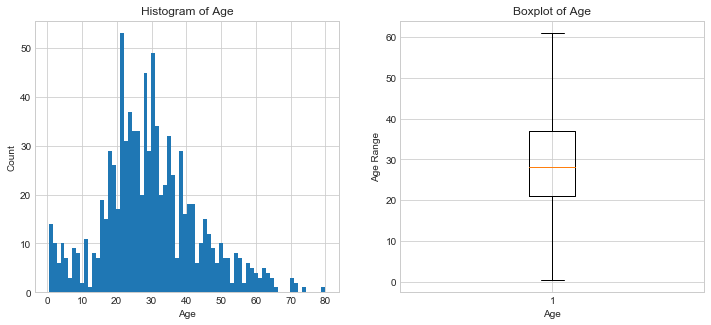

In [26]:
# 年龄的分布情况
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(train['Age'],bins=70,)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')

plt.subplot(1,2,2)
plt.boxplot(train['Age'], showfliers=False)#去掉异常值
plt.xlabel('Age')
plt.ylabel('Age Range')
plt.title('Boxplot of Age')

plt.show()

In [27]:
#查看年龄的分布情况
train.Age.describe()

count    891.000000
mean      29.660595
std       13.734620
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

可以看到样本中891人的平均年龄为30岁，标准差差13.7岁，年龄最小的为0.42岁，最大的为80岁

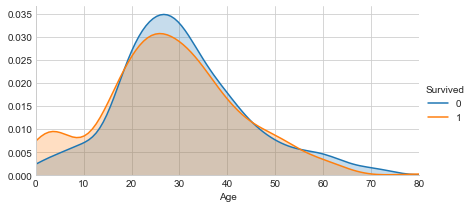

In [28]:
#不同年龄下的生还和非生还的分布情况
facet = sns.FacetGrid(train,hue='Survived',aspect=2)#aspect表示长宽比
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

In [29]:
#将年龄进行成儿童，少年，成年和老年四个群体，分析每个群体的生存情况
age_bins = [0, 12, 18, 65, 80]
train['Age_group'] = pd.cut(train['Age'],bins=age_bins)
groupby_age = train.groupby('Age_group')['Survived'].mean()
groupby_age

Age_group
(0, 12]     0.506173
(12, 18]    0.466667
(18, 65]    0.364512
(65, 80]    0.125000
Name: Survived, dtype: float64

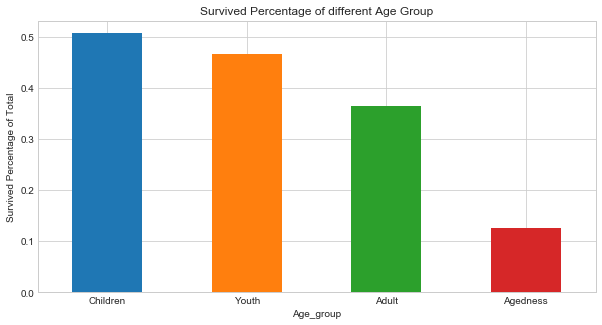

In [30]:
fig,axes = plt.subplots(1,1,figsize=(10,5))
groupby_age.plot(kind='bar',rot=0)
axes.set_xticklabels(['Children','Youth','Adult','Agedness'])
plt.title('Survived Percentage of different Age Group')
plt.ylabel('Survived Percentage of Total')
plt.show()

### SibSp

In [31]:
#将数据分为有无兄弟姐妹两组：
sibsp_df = train[train['SibSp'] !=0]
no_sibsp_df = train[train['SibSp'] ==0 ]

In [149]:
#有兄弟姐妹的生还情况
sibsp_df['Survived'].value_counts(sort=False)

0    151
1    132
Name: Survived, dtype: int64

In [150]:
#无兄弟姐妹的生还情况
no_sibsp_df['Survived'].value_counts(sort=False)

0    398
1    210
Name: Survived, dtype: int64

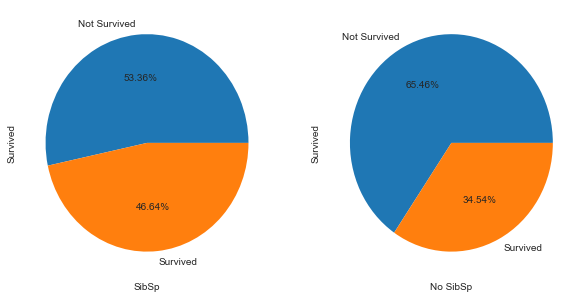

In [39]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
sibsp_df['Survived'].value_counts(sort=False).plot.pie(labels=('Not Survived','Survived'),
                                            autopct='%1.2f%%')
plt.xlabel('SibSp')

plt.subplot(1,2,2)
no_sibsp_df['Survived'].value_counts(sort=False).plot.pie(labels=('Not Survived','Survived'),
                                               autopct='%1.2f%%')
plt.xlabel('No SibSp')

plt.show()

可以看到有兄弟姐妹的乘客生还率为46.64%，无兄弟姐妹的生还率为34.54%

### 有无父母子女的生还情况

In [34]:
#将数组分成两组，有父母子女和无父母子女
parch_df = train[train['Parch'] != 0]
no_parch_df = train[train['Parch'] == 0]

In [151]:
#有父母子女的生还情况
parch_df['Survived'].value_counts(sort=False)

0    104
1    109
Name: Survived, dtype: int64

In [152]:
#无父母子女的生还情况
no_parch_df['Survived'].value_counts(sort=False)

0    445
1    233
Name: Survived, dtype: int64

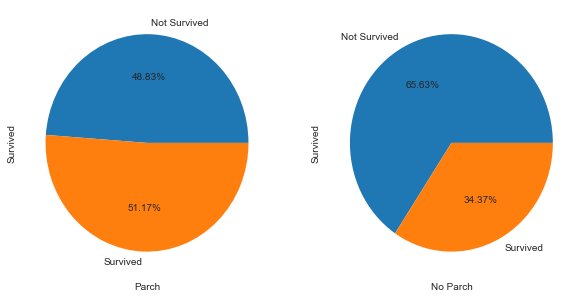

In [38]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
parch_df['Survived'].value_counts(sort=False).plot.pie(labels=('Not Survived','Survived'),
                                            autopct='%1.2f%%')
plt.xlabel('Parch')

plt.subplot(1,2,2)
no_parch_df['Survived'].value_counts(sort=False).plot.pie(labels=('Not Survived','Survived'),
                                               autopct='%1.2f%%')
plt.xlabel('No Parch')

plt.show()

可以看到有父母或子女同船的乘客，生还率为51.17%，而无父母或子女同船的乘客，生还率仅为34.37%

#### 亲友的数量和生还之间的关系


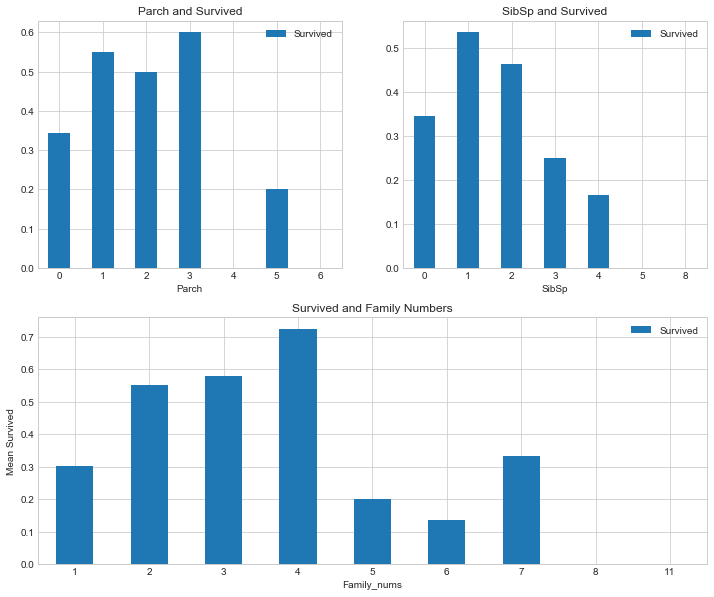

In [73]:
#fig, axes = plt.subplots(1,2,figsize=(12,5))
from matplotlib.gridspec import GridSpec

#设置子图的大小
fig = plt.figure(12,figsize=(12,10))
gs = GridSpec(2, 2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,:])

#绘制Parch子图
survived_by_parch = train[['Parch','Survived']].groupby(['Parch']).mean()
survived_by_parch.plot(kind='bar',ax=ax1,title='Parch and Survived',rot=0)
plt.ylabel('Mean Survived')

#绘制SibSp子图
survived_by_sibsp = train[['SibSp','Survived']].groupby(['SibSp']).mean()
survived_by_sibsp.plot(kind='bar',ax=ax2,title='SibSp and Survived',rot=0)
plt.ylabel('Mean Survived')

#把有无兄弟姐妹和父母子女算在一起，分析生还情况
train['Family_nums'] = train['SibSp'] + train['Parch'] + 1
survived_by_family_nums = train[['Family_nums','Survived']].groupby('Family_nums').mean()
survived_by_family_nums.plot(kind='bar',ax=ax3,title='Survived and Family Numbers',rot=0)
plt.ylabel('Mean Survived')
plt.show()

从图中可以看到，当只有自己一人时，生存率时比较低的，只有30%左右。但如果亲友很多，超过5个时生存率也会降低

### 不同票价下的生还率

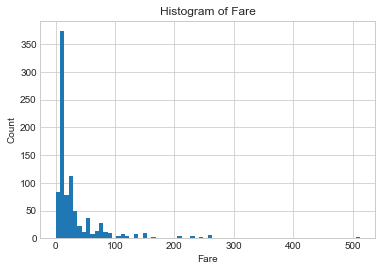

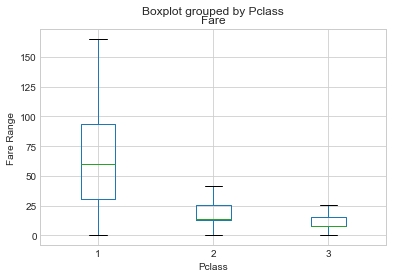

In [89]:
# 票价的分布情况

plt.hist(train['Fare'],bins=70,)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Histogram of Fare')

train.boxplot(column='Fare',by='Pclass',showfliers=False)#去掉异常值
plt.ylabel('Fare Range')

plt.show()

可以看到1、2、3等舱价格差异很大，根据前面的分析，1、2、3等舱的存活率依次降低

#### 分析票价与存活之间的关系

In [90]:
#查看票价的统计分布情况
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

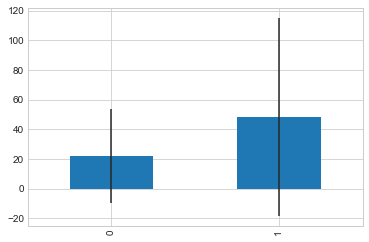

In [110]:
fare_not_survived = train[train['Survived']==0]['Fare']
fare_survived = train[train['Survived']==1]['Fare']

avg_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])

avg_fare.plot(yerr=std_fare,kind='bar',legend=False)
plt.show()

从上图可以看出，票价与是否生还存在一定的关系，生还者的平均价格要比未生还者的平均票价高。


### Cabin与生还之间的关系

Cabin船舱缺失值太多，难以针对其进行分析，这里将船舱分为有无来分析，看有无船舱的存活率情况

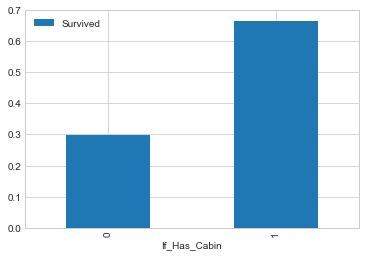

In [120]:
train['If_Has_Cabin'] = train['Cabin'].apply(lambda x: 0 if x=='UN999' else 1)
train[['If_Has_Cabin','Survived']].groupby('If_Has_Cabin').mean().plot.bar()

可以看到有船舱的存活率要高很多，但因船舱的缺失值太多，而且只是将缺失值用一个值进行替换，所以上面的数据不太可行，可以在后面的分析中剔除船舱这一特征值

### 不同港口的生还情况

In [153]:
#不同港口上船的乘客生还数量
train['PassengerId'].groupby([train['Embarked'],train['Survived']]).count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: PassengerId, dtype: int64

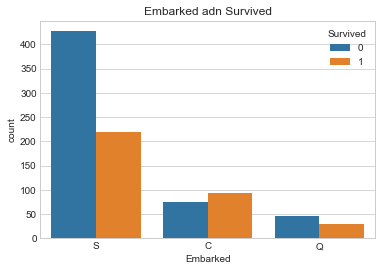

In [137]:
#不同港口上船的乘客的生还情况
sns.countplot('Embarked',hue='Survived', data=train,)
plt.title('Embarked adn Survived')
plt.show()

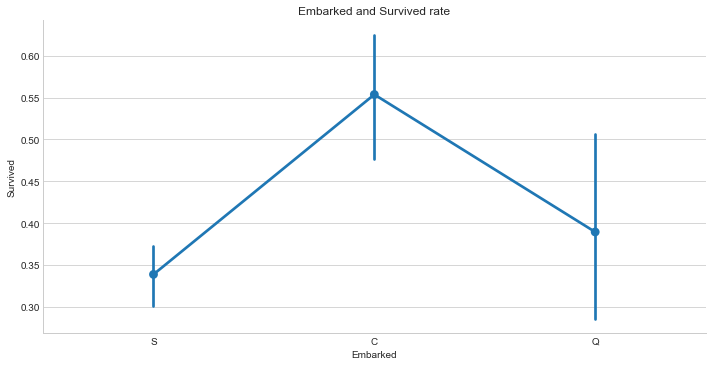

In [138]:
sns.factorplot(x='Embarked',y='Survived',data=train,size=5,aspect=2)
plt.title('Embarked and Survived rate')
plt.show()

从图中可以看出，从登船口岸来看，C口岸上船的生还率最高，比55%还高。其次是Q口岸，生还率达到了38%左右。
最低的是S口岸，只有33%左右。